# 1차원 데이터
- 평균값(기댓값), 표본분산, 불편분산(ddof=1), 표준편차
- 표본분산은 표본의 평균을 사용해서 분산을 계산한 값으로 분산을 과소 추정하는 경향이 있으며 그 경향을 없애기 위한 것이 불편분산임. 표본분산 보다 조금 큰 값이 된다.
- 표준화 : 평균값이 큰 변수와 작은 변수가 섞여 있으면 다루기 어려우므로 표준화로 데이터를 비교하기 쉽게 한다.
- 최댓값, 최솟값, 중앙값, 사분위수
- 표본분산과 비편향 분산
    - 분산은 표본 분산과 불편분산(unbiased variance)의 두 종류가 존재
    - 표본 분산은 표본에서 계산된 분산이며 모집단에 비해 표본수가 적을 때는 표본 분산이 모분산보다 작아진다.
    - 즉 표본 분산이 모집단 분산에 맞춰서 동일하게 보정한 것을 비편향 분산이라 한다. (편향을 없애는 것)
    - 통계학에서는 이 비편향분산을 사용하는 경우가 많다.
    - 불편분산은 n대신 n-1로 나누어 구할 수 있다.


[표분분산이 분산을 과소 평가하는 이유]

- 호수안에 물고기가 7마리가 있다. 몸길이 {1,2,3,4,5,6,7}, 모평균 4, 샘플링1 3마리{1,2,3} 표본평균 2, 샘플링2 {5,6,7} 표본평균 6
--> 평균은 같아 샘플링을 합친 총 표본의 평균은 8/2 = 4
- 이때 분산은 모평균을 모르기 때문에 표본평균과의 거리를 계산하며 분산을 과소평가 하게된다.
- 표본 분산 보다 조금 더 큰 값이 되도록 보정하기 위하여 N대신 N-1로 나누어 불편분산을 구할 수 있다.


In [1]:
# 애림님 코드중  pd.options.display.max_rows
# cf) https://runebook.dev/ko/docs/pandas/user_guide/options

## 1-1 데이터 중심의 지표

In [2]:
import pandas as pd 
import numpy as np
#jupyter notebook의 출력을 소수점 이하 3자리로 제한
#DataFrame의 출력을 소수점 이하 3자리로 제한 

%precision 3 
pd.get_option('display.precision', 3) 

6

In [3]:
pd.options.display.float_format = '{:.3f}'.format

In [4]:
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.2f}".format(x)})

In [5]:
df = pd.read_csv('data/ch2_scores_em.csv', index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [6]:
#10명의 영어점수 사용 
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [7]:
scores_df = pd.DataFrame({'score':scores}, index=pd.Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


### 대푯값

#### 평균

In [8]:
#numpy 안쓰고
sum(scores) / len(scores)

55.0

In [9]:
# numpy 쓰고
np.mean(scores)

55.0

In [10]:
#Series 에서
scores_df.mean()

score   55.000
dtype: float64

#### 중앙값

In [11]:
#먼저, 크기순으로 나열
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [12]:
#인덱스 0부터 시작 주의
n = len(sorted_scores)
print(n)

if n % 2 == 0:
    m0 = sorted_scores[int(n/2) - 1]
    m1 = sorted_scores[int((n/2))]
    mid = (m0 + m1) / 2
else:
    mid = sorted_scores[int((n + 1)/ 2) - 1]
mid

10


56.5

In [13]:
#numpy 함수 사용
np.median(scores)

56.5

In [14]:
#Series 에서
scores_df.median()

score   56.500
dtype: float64

#### 최빈값

In [15]:
pd.Series([1,1,1,2,2,3]).mode()

0    1
dtype: int64

## 데이터의 산포도 지표

### 분산과 표준편차

In [16]:
#편차

mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.00, 14.00, 1.00, -14.00, 2.00, -7.00, 10.00, -6.00, 10.00,
       3.00])

In [17]:
another_scores = [50, 60, 58, 54, 51, 56, 57, 53, 52, 59]
another_mean = np.mean(another_scores)
another_deviation = another_scores - another_mean
another_deviation

array([-5.00, 5.00, 3.00, -1.00, -4.00, 1.00, 2.00, -2.00, -3.00, 4.00])

In [18]:
summary_df = scores_df.copy()
summary_df['deviation'] = deviation
summary_df

,score,deviation
student,,
A,42,-13.000
B,69,14.000
C,56,1.000
D,41,-14.000
E,57,2.000
F,48,-7.000
G,65,10.000
H,49,-6.000
I,65,10.000


In [19]:
summary_df.mean()

score       55.000
deviation    0.000
dtype: float64

#### 분산

In [20]:
np.mean(deviation ** 2)

86.0

In [21]:
np.var(deviation) #numpy의 분산은 표본분산 

86.0

In [22]:
scores_df.var() #pandas의 분산은 불편분산 

score   95.556
dtype: float64

In [23]:
summary_df['square of deviation'] = np.square(deviation)
summary_df

,score,deviation,square of deviation
student,,,
A,42,-13.000,169.000
B,69,14.000,196.000
C,56,1.000,1.000
D,41,-14.000,196.000
E,57,2.000,4.000
F,48,-7.000,49.000
G,65,10.000,100.000
H,49,-6.000,36.000
I,65,10.000,100.000


In [24]:
summary_df.mean()

score                 55.000
deviation              0.000
square of deviation   86.000
dtype: float64

#### 표준편차

In [25]:
np.sqrt(np.var(scores, ddof=0))

9.273618495495704

In [26]:
np.std(scores, ddof=0)

9.273618495495704

### 범위와 사분위 범위

#### 범위

In [27]:
np.max(scores) - np.min(scores)

28

#### 사분위 범위

In [28]:
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.0

#### 데이터의 지표 정리

In [29]:
pd.Series(scores).describe()

count   10.000
mean    55.000
std      9.775
min     41.000
25%     48.250
50%     56.500
75%     63.250
max     69.000
dtype: float64

## 과제 0822

### [과제 0822_1]
교재 ~ 51page 코드 문제 풀기

### [과제 0822_2]
20개 원소로 구성되는 배열을 만든 후, 평균, 편차 및 편차의 합을 구하세요.

In [30]:
weight = np.array([51, 53, 52, 60, 61, 62, 70, 73, 65, 67, 57, 50, 63, 55, 56, 64, 69, 71, 72, 68])
len(weight)

20

In [31]:
#평균
mean = weight.mean()
mean

61.95

In [32]:
#편차 및 편차의 합 
deviation = weight - mean
print(deviation)
print(deviation.sum())

[-10.95 -8.95 -9.95 -1.95 -0.95 0.05 8.05 11.05 3.05 5.05 -4.95 -11.95
 1.05 -6.95 -5.95 2.05 7.05 9.05 10.05 6.05]
-5.684341886080802e-14


### [과제 0822_3]
표본분산과 불편분산의 차이를 사례를 들어 설명하세요.

In [33]:
import pandas as pd
df = pd.read_csv('국민건강보험공단_건강검진정보_가공데이터.csv',encoding='cp949')
sugar = df[['식전혈당(공복혈당)']]
sugar = sugar.dropna()

In [34]:
import numpy as np
blood_sugar = np.array(sugar['식전혈당(공복혈당)'])
mean = blood_sugar.mean()
mean

100.8631610697768

In [35]:
deviation = blood_sugar - mean
deviation

array([-7.86, -11.86, -0.86, ..., -20.86, -15.86, -18.86])

In [36]:
blood_sugar1= sugar.copy()
blood_sugar1['deviation'] = deviation
blood_sugar1['square of deviation'] = np.square(blood_sugar1['deviation'])
blood_sugar1

,식전혈당(공복혈당),deviation,square of deviation
0,93.000,-7.863,61.829
1,89.000,-11.863,140.735
2,100.000,-0.863,0.745
3,85.000,-15.863,251.640
4,91.000,-9.863,97.282
...,...,...,...
9995,80.000,-20.863,435.271
9996,92.000,-8.863,78.556
9997,80.000,-20.863,435.271
9998,85.000,-15.863,251.640


In [37]:
#모집단의 분산 
#이거는 그냥 var로 해도됨 - 모집단의 평균으로 분산을 알아서 구해주니까 
#표본 뽑은거는 그 데이터로 var를 해주니까 자동적으로 표본 분산이고 
blood_sugar1['square of deviation'].mean()

577.6757251373383

In [38]:
#표본 하나 뽑기
sample_sugar = blood_sugar1[500:1500]

In [39]:
#표본 분산
sample_sugar['식전혈당(공복혈당)'].var(ddof=0)

406.87303099999997

In [40]:
#불편 분산
sample_sugar['식전혈당(공복혈당)'].var(ddof=1)

407.28031131131127

### [과제 0822_4]
중앙값 > 평균값인 경우와 중앙값 < 평균값인 두가지 집합에서 나타나는 가능성있는 특징을 사례로 설명하세요. 

In [41]:
# 중앙값 < 평균값 - > 이상치가 있을 때 
a = np.array([1,2,4,5,30])
b = np.sort(a)
print(b.mean())
np.median(b)

8.4


4.0

In [42]:
# 중앙값 > 평균값 -> 크기 순으로 자료를 정렬했을때, 다른 데이터들 보다, 중간 크기의 값들이 많을때 
a = np.array([10,20,41,45,47,60])
b = np.sort(a)
print(b.mean())
np.median(b)

37.166666666666664


43.0

### [과제 0822_5]
4분위를 이용하여 이상치를 구하는 사례를 생성하고, 시각화 및 이상치를 산출하는 과정을 설명하세요.

In [43]:
df = pd.read_csv('국민건강보험공단_건강검진정보_가공데이터.csv',encoding='cp949')
eye = df[['시력(좌)']]
eye = eye.dropna()
eye_se = eye['시력(좌)']

In [44]:
eye_se_Q1 = np.percentile(eye_se, 25)
eye_se_Q3 = np.percentile(eye_se, 75)

eye_iqr = eye_se_Q3 - eye_se_Q1
eye_iqr

0.5

In [45]:
print(eye_se_Q1)
print(eye_se_Q3)

0.7
1.2


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='시력(좌)'>

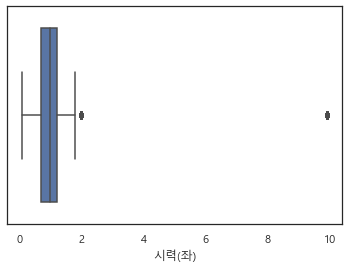

In [47]:
import seaborn as sns
sns.boxplot(eye_se)

In [48]:
#이상치 산출
outlier = eye[eye['시력(좌)'] > eye_se_Q3]
outlier['시력(좌)'].unique()  

array([1.50, 2.00, 1.60, 9.90, 1.30, 1.80])

## 데이터의 정규화

In [49]:
df = pd.read_csv('data/ch2_scores_em.csv', index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [50]:
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [51]:
scores_df = pd.DataFrame({'score':scores}, index=pd.Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [52]:
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.40, 1.51, 0.11, -1.51, 0.22, -0.75, 1.08, -0.65, 1.08, 0.32])

In [53]:
np.mean(z), np.std(z, ddof=0)

(-1.6653345369377347e-17, 0.9999999999999999)

In [54]:
#편차값은 평균이 50, 표준편차가 10이 되도록 정규화한 값이다. 
z = 50 + 10 * z
scores_df['deviation_value'] = z
scores_df

,score,deviation_value
student,,
A,42,35.982
B,69,65.097
C,56,51.078
D,41,34.903
E,57,52.157
F,48,42.452
G,65,60.783
H,49,43.530
I,65,60.783


## 1차원 데이터의 시각화

### 도수분포표

In [55]:
df = pd.read_csv('data/ch2_scores_em.csv', index_col='student number')
english_scores = np.array(df['english'])
pd.Series(english_scores).describe()

count   50.000
mean    58.380
std      9.800
min     37.000
25%     54.000
50%     57.500
75%     65.000
max     79.000
dtype: float64

In [56]:
freq, _ = np.histogram(english_scores, bins = 10, range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [57]:
#0~10, 10~20,.. 이라는 문자열 리스트를 작성
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]

#freq_class를 인덱스로 데이터 프레임 생성
freq_dist_df = pd.DataFrame({'frequency':freq}, index = pd.Index(freq_class, name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [58]:
#계급값
class_value = [(i+(i+10)) // 2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [59]:
#상대도수
rel_freq = freq / freq.sum()
rel_freq

array([0.00, 0.00, 0.00, 0.04, 0.16, 0.32, 0.36, 0.12, 0.00, 0.00])

In [60]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.00, 0.00, 0.00, 0.04, 0.20, 0.52, 0.88, 1.00, 1.00, 1.00])

In [61]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class value','frequency', 'relative frequency','cumulative relative frequency' ]]
freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.000,0.000
10~20,15,0,0.000,0.000
20~30,25,0,0.000,0.000
30~40,35,2,0.040,0.040
40~50,45,8,0.160,0.200
50~60,55,16,0.320,0.520
60~70,65,18,0.360,0.880
70~80,75,6,0.120,1.000
80~90,85,0,0.000,1.000


### 히스토그램

In [62]:
import matplotlib.pyplot as plt

%matplotlib inline



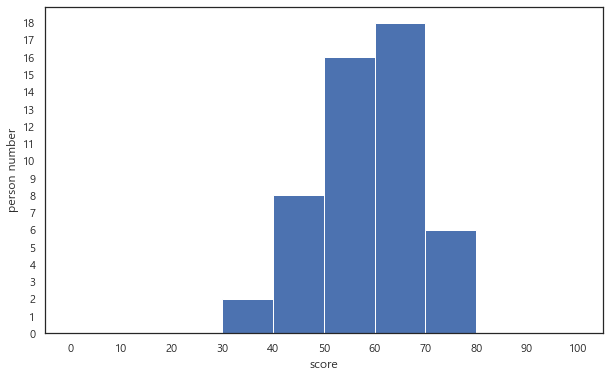

In [63]:
#캔버스를 생성
#figsize로 가로, 세로 크기 지정
fig = plt.figure(figsize=(10,6))

#캔버스 위에 그래프를 그리기 위한 영역을 지정
#인수는 영역을 1x1개 지정, 하나의 영역에 그린다는것을 의미
ax = fig.add_subplot(111)

#계급수를 10으로 해서 히스토그램 그림
freq,_,_ = ax.hist(english_scores, bins=10, range=(0,100))

#x축에 레이블 부여
ax.set_xlabel('score')
#y축에 레이블 부여
ax.set_ylabel('person number')
#x축을 0, 10, 20, ...,100 눈금으로 구분
ax.set_xticks(np.linspace(0, 100, 10+1))
#y축을 0, 1, 2, ...의 눈금으로 구분
ax.set_yticks(np.arange(0, freq.max() + 1))

#그래프 표시
plt.show()



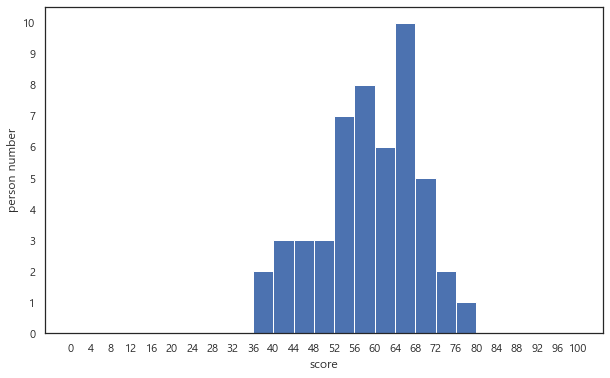

In [64]:
#ex) 계급수를 25(즉, 계급폭을 4)

#캔버스를 생성
#figsize로 가로, 세로 크기 지정
fig = plt.figure(figsize=(10,6))

#캔버스 위에 그래프를 그리기 위한 영역을 지정
#인수는 영역을 1x1개 지정, 하나의 영역에 그린다는것을 의미
ax = fig.add_subplot(111)

#계급수를 10으로 해서 히스토그램 그림
freq,_,_ = ax.hist(english_scores, bins=25, range=(0,100))

#x축에 레이블 부여
ax.set_xlabel('score')
#y축에 레이블 부여
ax.set_ylabel('person number')
#x축을 0, 10, 20, ...,100 눈금으로 구분
ax.set_xticks(np.linspace(0, 100, 25+1))
#y축을 0, 1, 2, ...의 눈금으로 구분
ax.set_yticks(np.arange(0, freq.max() + 1))

#그래프 표시
plt.show()

In [65]:
weights = np.ones_like(english_scores) / len(english_scores)
weights = weights[:10] 
weights

array([0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02])

In [66]:
freq, _ = np.histogram(english_scores, bins = 10, range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [67]:
weights * freq

array([0.00, 0.00, 0.00, 0.04, 0.16, 0.32, 0.36, 0.12, 0.00, 0.00])

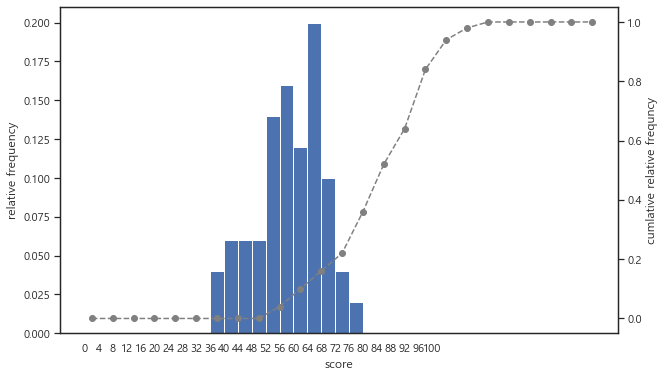

In [68]:
#상대도수의 히스토그램 + 누적상대도수의 꺾은선 그래프

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)

#Y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()

#상대도수의 히스토그램을 그리기 위해서는 도수를 데이터의 수로 나눌 필요가 있다.
#hist의 인수 weights를 지정하면 실현 가능
weights = np.ones_like(english_scores) / len(english_scores)

#상대도수 반환
rel_freq, _, _ = ax1.hist(english_scores, bins=25,
                          range=(0, 100), weights=weights)

#누적상대도수
cum_rel_freq = np.cumsum(rel_freq)
#계급값
class_value = [ i + (i + 4) // 2 for i in range(0,100,4)]

#꺾은선 그래프
#Is를 '--'로 하면 점선이 그려짐
#marker를 'o'로 하면 데이터 점을 그림
#color를 'gray'로 하면 회색으로 지정
ax2.plot(class_value, cum_rel_freq, ls='--', marker='o', color='gray')

#꺾은선 그래프의 눈금선을 제거
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumlative relative frequncy')
ax1.set_xticks(np.linspace(0, 100, 25+1))

plt.show()

### 상자그림(Box plot)

#### Box plot 의미 해석

* IQR(Inter Quartile Range): 제 3사분위수 - 제1사분위수
* lower whisker: Q1 - 1.5 x IQR 이내인 값중에서 최솟값 
* upper whisker: Q3 + 1.5 x IQR 이내인 값중에서 최댓값
--> 아 얘네는 그 가로 선임 
* 이상치: lower whisker, upper whisker를 벗어나는 값

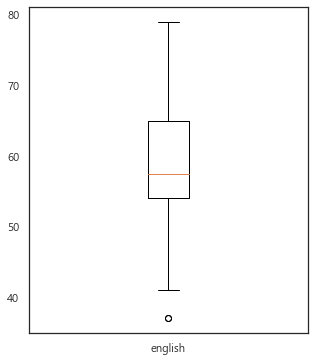

In [69]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['english'])

plt.show()

# 2차원 데이터 정리

## 두 데이터 사이의 관계를 나타내는 지표

### 공분산

In [70]:
import pandas as pd 
import numpy as np
df = pd.read_csv('data/ch2_scores_em.csv', index_col='student number')
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores, 'mathematics':ma_scores},
                        index = pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name = 'student'))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [71]:
summary_df = scores_df.copy()
summary_df['english_deviation'] = summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] = summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviations'] = summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.000,-6.400,83.200
B,69,80,14.000,8.600,120.400
C,56,63,1.000,-8.400,-8.400
D,41,63,-14.000,-8.400,117.600
E,57,76,2.000,4.600,9.200
F,48,60,-7.000,-11.400,79.800
G,65,81,10.000,9.600,96.000
H,49,66,-6.000,-5.400,32.400
I,65,78,10.000,6.600,66.000


In [72]:
summary_df['product of deviations'].mean()

62.8

In [73]:
cov_mat = np.cov(en_scores, ma_scores, ddof=0) #표본분산
cov_mat

array([[86.00, 62.80],
       [62.80, 68.44]])

In [74]:
cov_mat[0,1], cov_mat[1,0]

(62.800000000000004, 62.800000000000004)

In [75]:
cov_mat[0,0], cov_mat[1,1]

(86.0, 68.44000000000001)

### 상관계수

In [76]:
np.cov(en_scores, ma_scores, ddof=0)[0,1] / (np.std(en_scores * np.std(ma_scores)))

0.8185692341186714

In [77]:
np.corrcoef(en_scores, ma_scores)

array([[1.00, 0.82],
       [0.82, 1.00]])

In [78]:
scores_df.corr()

,english,mathematics
english,1.000,0.819
mathematics,0.819,1.000


## 2차원 데이터의 시각화

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
import numpy as np

### 산점도

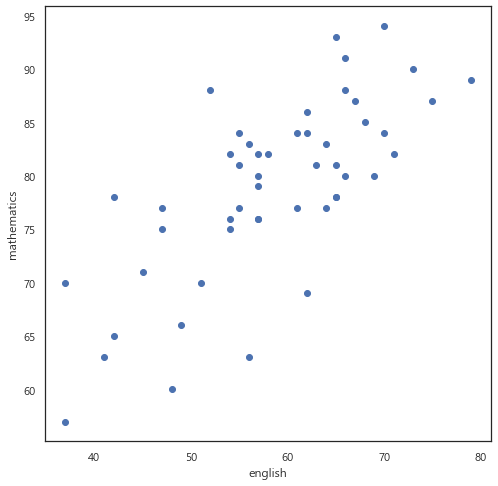

In [81]:
english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

#산점도
ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()

### 회귀직선

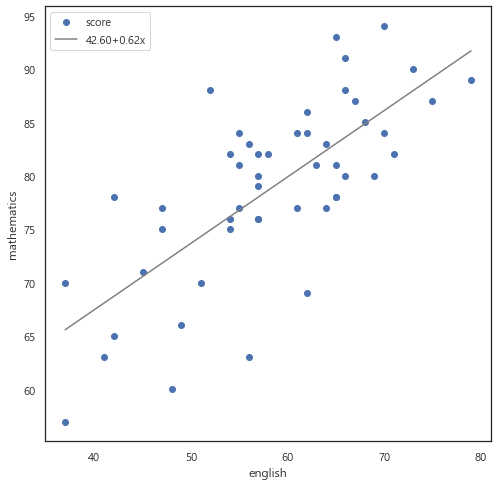

In [82]:
# 계수β_0와β_1를 구한다
poly_fit = np.polyfit(english_scores, math_scores, 1)
# β_0+β_1 x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)
# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace(english_scores.min(), english_scores.max())
# xs에 대응하는 y좌표를 구한다
ys = poly_1d(xs)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.scatter(english_scores, math_scores, label='score')
ax.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
# 범례의 표시
ax.legend(loc='upper left')

plt.show()

In [83]:
import numpy as np

#변수명 a, 입력 배열을 근으로 사용
equation1 = np.poly1d([1, 2], True, variable = 'a')

#변수명 기본값x, 입력 배열을 근으로 사용
equation2 = np.poly1d([1, 2], True)

#변수명 기본값x, 입력 배열을 근으로 사용 
equation3 = np.poly1d([1, 2], False)

print(equation1)
print(equation2)
print(equation3)

   2
1 a - 3 a + 2
   2
1 x - 3 x + 2
 
1 x + 2


In [84]:
equation3(1)

3

In [85]:
#np.polyfit 예시 
x = [1, 2, 3, 4, 5, 6]
y = [1, 3, 6, 8, 11, 19]
ex_polyfit = np.polyfit(x, y, 1)
print(ex_polyfit)
print(ex_polyfit[0])
print(ex_polyfit[1])

[3.31 -3.60]
3.314285714285714
-3.5999999999999925


### 히트맵

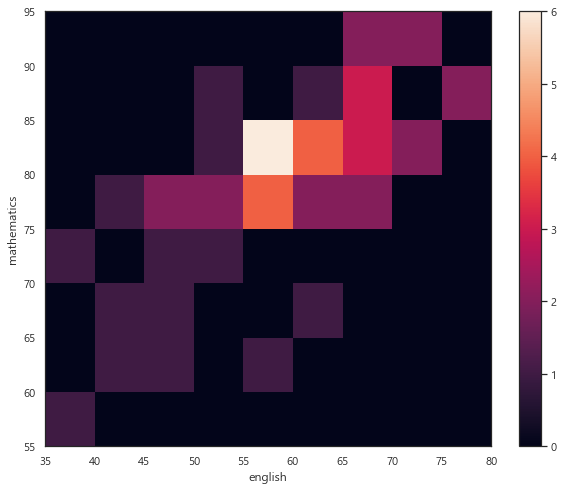

In [86]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores, bins=[9,8], range=[(35, 80), (55, 95)])

ax.set_xlabel('english')
ax.set_ylabel('mathematics')
#눈금 설정
ax.set_xticks(c[1])
ax.set_yticks(c[2])

#컬러바 표시
fig.colorbar(c[3], ax=ax)
plt.show()

In [87]:
print(c[1])
print(c[2])

[35.00 40.00 45.00 50.00 55.00 60.00 65.00 70.00 75.00 80.00]
[55.00 60.00 65.00 70.00 75.00 80.00 85.00 90.00 95.00]


In [88]:
c[1]

array([35.00, 40.00, 45.00, 50.00, 55.00, 60.00, 65.00, 70.00, 75.00,
       80.00])

### 앤스컴

In [89]:
anscombe_data = np.load('data/ch3_anscombe.npy')
print(anscombe_data)
anscombe_data[0]

[[[10.00 8.04]
  [8.00 6.95]
  [13.00 7.58]
  [9.00 8.81]
  [11.00 8.33]
  [14.00 9.96]
  [6.00 7.24]
  [4.00 4.26]
  [12.00 10.84]
  [7.00 4.82]
  [5.00 5.68]]

 [[10.00 9.14]
  [8.00 8.14]
  [13.00 8.74]
  [9.00 8.77]
  [11.00 9.26]
  [14.00 8.10]
  [6.00 6.13]
  [4.00 3.10]
  [12.00 9.13]
  [7.00 7.26]
  [5.00 4.74]]

 [[10.00 7.46]
  [8.00 6.77]
  [13.00 12.74]
  [9.00 7.11]
  [11.00 7.81]
  [14.00 8.84]
  [6.00 6.08]
  [4.00 5.39]
  [12.00 8.15]
  [7.00 6.42]
  [5.00 5.73]]

 [[8.00 6.58]
  [8.00 5.76]
  [8.00 7.71]
  [8.00 8.84]
  [8.00 8.47]
  [8.00 7.04]
  [8.00 5.25]
  [19.00 12.50]
  [8.00 5.56]
  [8.00 7.91]
  [8.00 6.89]]]


array([[10.00, 8.04],
       [8.00, 6.95],
       [13.00, 7.58],
       [9.00, 8.81],
       [11.00, 8.33],
       [14.00, 9.96],
       [6.00, 7.24],
       [4.00, 4.26],
       [12.00, 10.84],
       [7.00, 4.82],
       [5.00, 5.68]])

In [90]:
import pandas as pd
stats_df = pd.DataFrame(index=['X_mean', 'X_variance', 'Y_mean',
                               'Y_variance', 'X&Y_correlation',
                               'X&Y_regression line'])
for i, data in enumerate(anscombe_data):

    dataX = data[:, 0]
    dataY = data[:, 1]
    poly_fit = np.polyfit(dataX, dataY, 1)
    stats_df[f'data{i+1}'] =\
        [f'{np.mean(dataX):.2f}',
         f'{np.var(dataX):.2f}',
         f'{np.mean(dataY):.2f}',
         f'{np.var(dataY):.2f}',
         f'{np.corrcoef(dataX, dataY)[0, 1]:.2f}',
         f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']
stats_df

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


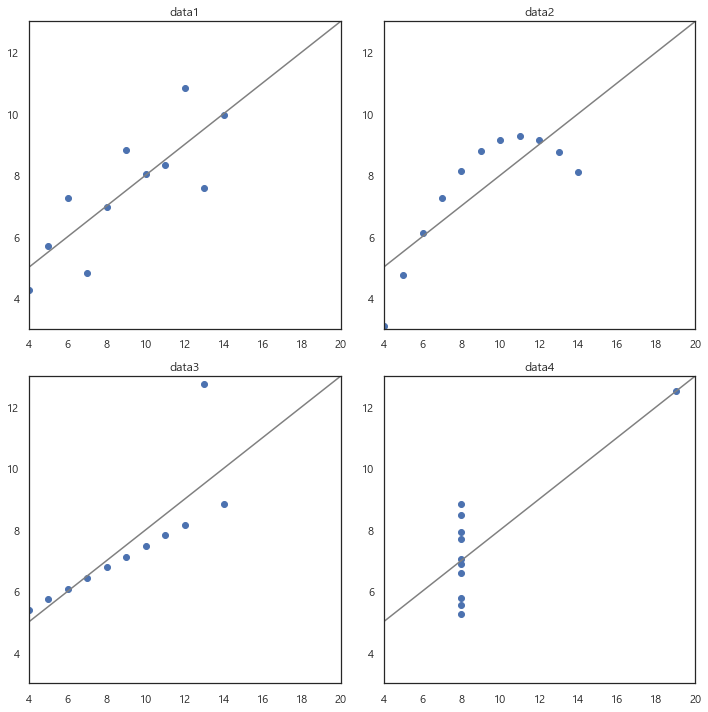

In [91]:
# 그래프를 그리기 위한 영역을 2x2개 생성
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10),
                         sharex=False, sharey=False)

xs = np.linspace(0, 30, 100)
for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0], data[:,1], 1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    # 그리는 영역을 선택
    ax = axes[i//2, i%2]
    ax.set_xlim([4, 20])
    ax.set_ylim([3, 13])
    # 타이틀을 부여
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0], data[:,1])
    ax.plot(xs, ys, color='gray')

# 그래프 사이의 간격을 좁힘
plt.tight_layout()
plt.show()

## 과제 0823

### [과제 0823_1] 
p52~83 예제 문제 풀어보기

### [과제 0823_2]
일차원 데이터를 생성하여 다음을 수행하세요.
- 도수분포표를 만들고 히스토그램으로 시각화하세요.(계급을 변경하여 2개 작성)
- 상대도수 및 누적상대도수를 도수분포표에 추가하고, 히스토그램과 누적상대도수를 시각화하세요.

### [과제 0823_3]
이차원 데이터를 생성하여 다음을 수행하세요.
- 공분산 및 상관계수를 구하세요.
- 이차원 데이터를 산점도, 히트맵으로 시각화한 후 인사이트를 기술하세요.


# 추측통계의 기본

In [92]:
df = pd.read_csv('data/ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

## 모집단과 표본

In [93]:
#무작위 추출 
#np.random.choice(추출대상이 되는 리스트, 표본 크기) -> 복원 추출
np.random.choice([1,2,3], 3)

array([1, 1, 1])

In [94]:
#replace=False -> 비복원추출
np.random.choice([1,2,3], 3, replace=False)

array([3, 1, 2])

In [95]:
np.random.seed(0)
np.random.choice([1,2,3], 3)

array([1, 2, 1])

In [96]:
#scores로부터 표본 크기 20으로 복원추출 재현
np.random.seed(0)
sample = np.random.choice(scores, 20)
sample.mean() #표본 평균 계산 

70.4

In [97]:
#모평균 
scores.mean()

69.53

In [98]:
#무작위추출은 실행할 때마다 결과가 달라지기에, 얻어진 표본 평균도 매번 달라짐
for i in range(5):
    sample = np.random.choice(scores, 20)
    print(f' {i+1}번째 무작위추출로 얻은 표본평균', sample.mean())

 1번째 무작위추출로 얻은 표본평균 72.45
 2번째 무작위추출로 얻은 표본평균 63.7
 3번째 무작위추출로 얻은 표본평균 66.05
 4번째 무작위추출로 얻은 표본평균 71.7
 5번째 무작위추출로 얻은 표본평균 74.15


## 확률 모형

In [99]:
dice = [1,2,3,4,5,6] #확률변수에 필요한 변수가 취할 수 있는 값
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21] #그 값이 나오는 확률 

In [100]:
np.random.choice(dice, p=prob)

1

In [101]:
num_trial = 100
sample = np.random.choice(dice, num_trial, p = prob)
sample

array([4, 6, 4, 5, 5, 6, 6, 3, 5, 6, 5, 6, 6, 2, 3, 1, 6, 5, 6, 3, 4, 5,
       3, 4, 3, 5, 5, 4, 4, 6, 4, 6, 5, 6, 5, 4, 6, 2, 6, 4, 5, 3, 4, 6,
       5, 5, 5, 3, 4, 5, 4, 4, 6, 4, 4, 6, 6, 2, 2, 4, 5, 1, 6, 4, 3, 2,
       2, 6, 3, 5, 4, 2, 4, 4, 6, 6, 1, 5, 3, 6, 6, 4, 2, 1, 6, 4, 4, 2,
       4, 1, 3, 6, 6, 6, 4, 5, 4, 3, 3, 4])

In [102]:
freq, _ = np.histogram(sample, bins = 6, range=(1,7))
pd.DataFrame({'frequency':freq,
             'relative frequency': freq / num_trial},
            index = pd.Index(np.arange(1,7), name='dice'))

,frequency,relative frequency
dice,,
1,5,0.050
2,9,0.090
3,13,0.130
4,27,0.270
5,19,0.190
6,27,0.270


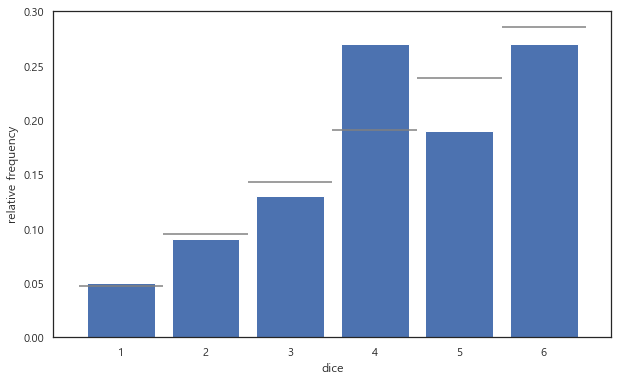

In [103]:
#https://wikidocs.net/92112

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1,7), density=True, rwidth=0.8)

#실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors = 'gray')
#막대그래프의 [1.5, 2.5, ..., 6,5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))
#주사위 눈의 값은 [1, 2, 3, 4, 5, 6]
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

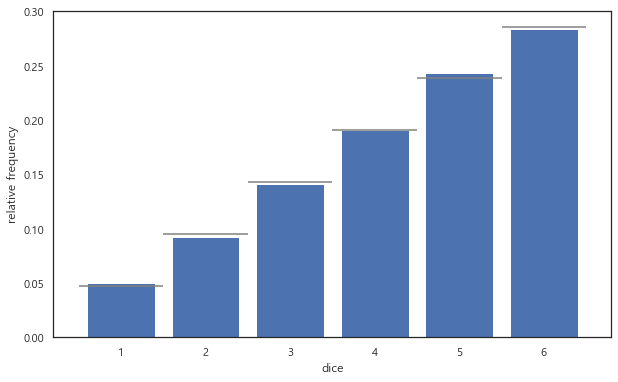

In [104]:
num_trial = 10000
sample = np.random.choice(dice, size=num_trial, p=prob)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1,7), density=True, rwidth=0.8)
ax.hlines(prob, np.arange(1,7), np.arange(2, 8), colors='gray')
ax.set_xticks(np.linspace(1.5, 6.5, 6))
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

## 추측통계의 확률 

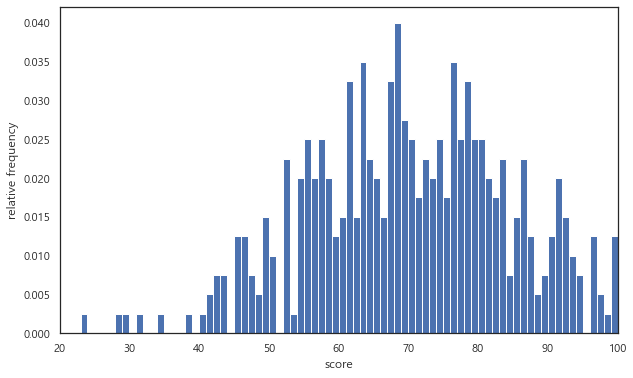

In [105]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0,100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

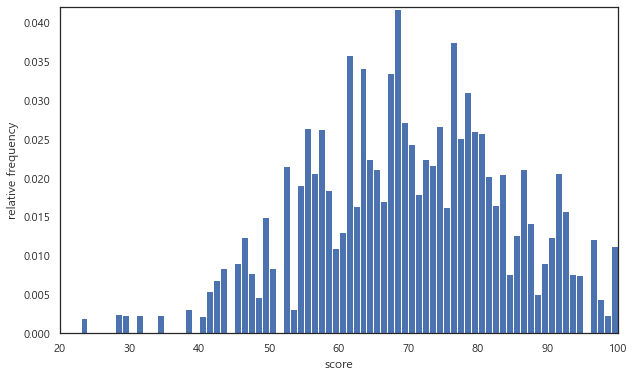

In [106]:
sample = np.random.choice(scores, 10000)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0,100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

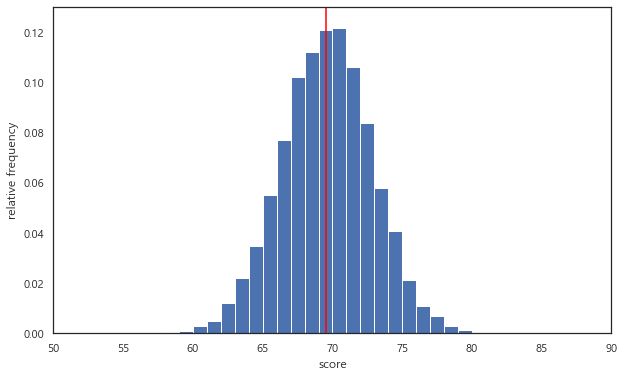

In [107]:
#위의 두 그래프의 동일성에 대한 증거라고 봐도 될 거 같애 
sample_means = [np.random.choice(scores, 20).mean() for _ in range(10000)]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0,100), density=True)
#모평균을 세로선으로 표시
ax.vlines(np.mean(scores), 0, 1, 'red')
ax.set_xlim(50, 90)
ax.set_ylim(0, 0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

## polyfit 함수 사용법
- poly(x,y,차수) 형태로 매우 간단하게 이용이 가능.

In [108]:
x = [1,2,3,4,5,6]
y = [1,3,6,8,11,19]

print(np.polyfit(x,y,1))
# y = 3.314x - 3.6

[3.31 -3.60]


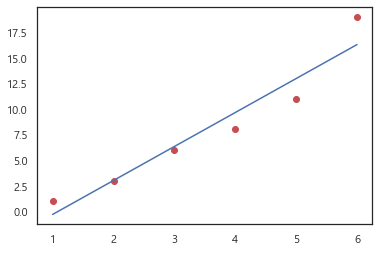

In [109]:
poly = np.polyfit(x,y,1)
y_pred = np.array(x) * poly[0] + poly[1]

plt.plot(x, y_pred, color = 'b')
plt.scatter(x,y,color='r')
plt.show()

In [110]:
# 2차 회귀식 및 시각화
print(np.polyfit(x,y,2))

[0.54 -0.44 1.40]


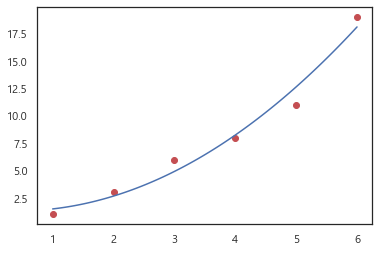

In [111]:
poly = np.polyfit(x,y,2)
x_line = np.linspace(1,6,100) # 곡선을 완만하게 그리기 위한 linspace 객체 선언
y_pred = x_line**2*poly[0] +x_line*poly[1] + poly[2]

plt.plot(x_line, y_pred, color='b')
plt.scatter(x,y,color='r')
plt.show()

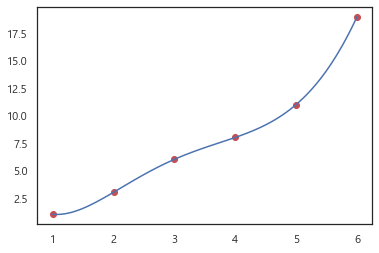

In [112]:
poly = np.polyfit(x,y,5)
x_line = np.linspace(1,6,100)
y_pred = np.zeros_like(x_line) # 예측값을 담을 그릇(모든 값이 0인 배열)
for i in range(6):
    y_pred += x_line**(5-i)*poly[i]
plt.plot(x_line,y_pred,color='b')
plt.scatter(x,y,color='r')
plt.show()

## 과제 0824

### [과제 0824_1]
p84~p112 코드문제를 모두 풀어보세요.

### [과제 0824_2]
적절한 데이터를 생성하고 polyfit을 이용하여 2, 3차 방정식을 만든 후 산점도 및 회귀식을 시각화하여 그 의미를 해석하세요.

### [과제_0824_3]
"어떤 모집단에서 표본을 랜덤하게 추출하여 표본평균을 구하면 그 표본평균은 모평균을 중심으로 분포한다."라는 주장을 사례를 만들어서 설득력있게 설명하세요.

# 이산형 확률변수

## 1차원 이산형 확률변수

In [113]:
#1차원 
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [114]:
import numpy as np
np.set_printoptions(precision=3)

In [115]:
x_set = np.array([1,2,3,4,5,6]) #확률변수가 취할 수 있는 값의 집합 정의

#불공정 값이 나오는 함수
def f(x):
    if x in x_set:
        return x / 21 #불공정 주사위
    else:
        return 0

In [116]:
X = [x_set, f]
X

[array([1, 2, 3, 4, 5, 6]), <function __main__.f(x)>]

In [117]:
X = [x_set, f] #확률변수

#확률 p_k를 구한다
prob = np.array([f(x_k) for x_k in x_set])
print(prob, '\n')

#확률변수와 확률을 딕셔너리형태로 만들어주자 
dict(zip(x_set,prob))

[0.048 0.095 0.143 0.19  0.238 0.286] 



{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

Text(0.5, 1.0, '확률 질량 함수 그래프')

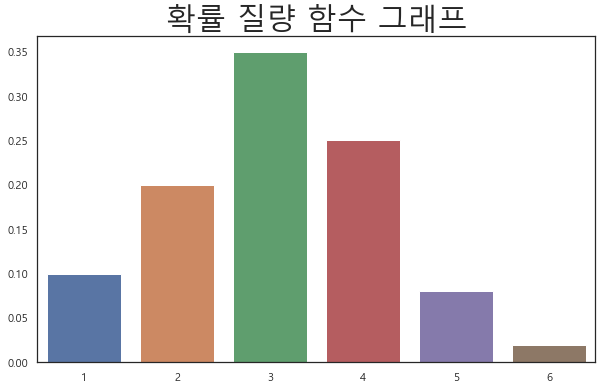

In [179]:
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10,6))
sns.barplot(x_set, prob)
plt.title('확률 질량 함수 그래프', fontsize=30)

In [119]:
#확률은 0은 될 수 있지만, -1은 될 수 없지 확인해볼까
np.all(prob>= 0)

True

In [120]:
#확률의 합은 항상 1이지 확인 
np.sum(prob)

0.9999999999999999

In [121]:
#누적 분포 함수
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

In [122]:
F(3)

0.2857142857142857

In [123]:
#확률변수의 변환: 확률변수 X에 2를 곱하고, 3을 더한 2X + 3도 확률변수가 된다. -> 대응되는 확률도 구할 수 있다.

y_set = np.array([2 * x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set, prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

In [124]:
#1차원 이산형 확률변수의 지표 (책으로 보심 )
np.sum([x_k * f(x_k) for x_k in x_set]) #확률 변수의 평균 - 4.333

4.333333333333333

In [125]:
 #확률적용 x
s1 = np.random.choice(x_set, int(10))
print(s1)
np.mean(s1)

[2 3 5 2 1 2 3 4 5 6]


3.3

In [126]:
s2 = np.random.choice(x_set, int(10), p=prob) #확률적용 , 기댓값이 더 크다. 위에보다 
print(s2)
np.mean(s2)

[1 4 3 1 4 2 5 4 6 5]


3.5

In [127]:
#확률변수의 기댓값은 확률 변수를 무제한 시행하여 얻은 실현값의 평균
#https://rfriend.tistory.com/548
#확률적용 x 
sample = np.random.choice(x_set, int(1e6)) #1e6 -> 백만 
np.mean(sample)

3.496135

In [128]:
#확률변수의 기댓값은 확률 변수를 무제한 시행하여 얻은 실현값의 평균
#https://rfriend.tistory.com/548
#확률적용
sample = np.random.choice(x_set, int(1e6), p=prob) #1e6 -> 백만 
np.mean(sample)

4.333022

In [129]:
#일반화
def E(X, g=lambda x: x):
    x_set, f = X  #X = [x_set, f]
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [130]:
E(X)

4.333333333333333

In [131]:
#일반화 함수 만든거로 확률변수 변환해보자 
E(X, g = lambda x: 2*x + 3)

11.666666666666664

In [132]:
#기댓값의 선형성
2*E(X) +3

11.666666666666666

In [133]:
# 분산
mean = E(X)
np.sum([(x_k - mean) ** 2 * f(x_k) for x_k in x_set])

2.2222222222222223

In [134]:
#일반화
def V(X, g= lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k) - mean) ** 2 * f(x_k) for x_k in x_set])

In [135]:
V(X)

2.2222222222222223

In [136]:
V(X, g = lambda x: 2*x +3)

8.88888888888889

In [137]:
2 ** 2*V(X)

8.88888888888889

## 2차원 이산형 확률변수

### 결합확률분포

In [182]:
x_set = np.arange(2,13)
y_set = np.arange(1, 7)

In [183]:
def f_XY(x, y):
    if 1 <= y <= 6 and 1 <= x - y <= 6:
        return y * (x-y) / 441
    else:
        return 0

In [184]:
XY = [x_set, y_set, f_XY]

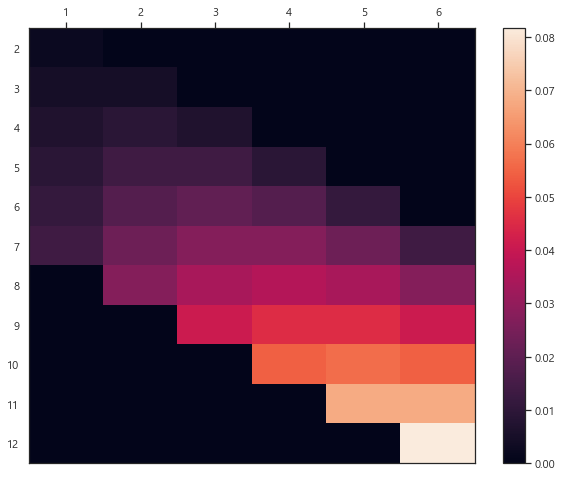

In [185]:
prob = np.array([[f_XY(x_i, y_j) for y_j in y_set] for x_i in x_set])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor = False) #False는 큰 눈금 #0.5를 더한거보니 딱 가운데 오게 하려고 네모가
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor = False) #False는 큰 눈금
ax.set_xticklabels(np.arange(1,7), minor = False)
ax.set_yticklabels(np.arange(2,13), minor = False)
#y축을 내림차순의 숫자가 되게 하여, 위아래 역전
ax.invert_yaxis()
#x축 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [191]:
print(prob)

[[0.002 0.    0.    0.    0.    0.   ]
 [0.005 0.005 0.    0.    0.    0.   ]
 [0.007 0.009 0.007 0.    0.    0.   ]
 [0.009 0.014 0.014 0.009 0.    0.   ]
 [0.011 0.018 0.02  0.018 0.011 0.   ]
 [0.014 0.023 0.027 0.027 0.023 0.014]
 [0.    0.027 0.034 0.036 0.034 0.027]
 [0.    0.    0.041 0.045 0.045 0.041]
 [0.    0.    0.    0.054 0.057 0.054]
 [0.    0.    0.    0.    0.068 0.068]
 [0.    0.    0.    0.    0.    0.082]]


In [189]:
prob.shape

(11, 6)

In [142]:
prob.shape[1]

6

In [143]:
np.all(prob >= 0)

True

In [144]:
np.sum(prob)

1.0

### 주변확률분포

In [145]:
#X의 주변분포
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

In [146]:
#Y의 주변분포
def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

In [147]:
X = [x_set, f_X]
Y = [y_set, f_Y]

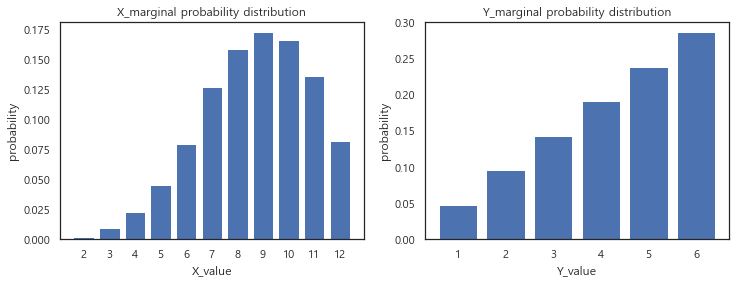

In [148]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')

plt.show()

### 2차원 이산형 확률변수의 지표

#### 기댓값

In [149]:
np.sum([x_i * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

8.666666666666666

In [150]:
#일반화

def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

In [151]:
mean_X = E(XY, lambda x, y: x)
mean_X

8.666666666666666

In [152]:
mean_Y = E(XY, lambda x, y: y)
mean_Y

4.333333333333333

In [153]:
#선형성 확인
a, b = 2, 3

In [154]:
E(XY, lambda x, y: a*x + b*y)

30.333333333333332

In [155]:
a * mean_X + b *mean_Y

30.333333333333332

#### 분산

In [156]:
np.sum([(x_i - mean_X)**2 * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

4.444444444444444

In [157]:
#일반화 
def V(XY, g):
    x_set, y_set, f_XY = XY
    mean = E(XY, g)
    return np.sum([(g(x_i, y_j) - mean)**2 * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])


In [158]:
var_X = V(XY, g = lambda x,y:x)
var_X

4.444444444444444

In [159]:
var_Y = V(XY, g = lambda x,y:y)
var_Y

2.2222222222222223

#### 공분산

In [160]:
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i - mean_X) * (y_j - mean_Y) *f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

In [161]:
cov_xy = Cov(XY)
cov_xy

2.222222222222222

In [162]:
V(XY, lambda x, y: a*x + b*y) #V(aX + bY)

64.44444444444444

In [163]:
a**2 * var_X + b**2 * var_Y + 2*a*b*cov_xy

64.44444444444443

#### 상관계수

In [164]:
cov_xy / np.sqrt(var_X * var_Y)

0.7071067811865474

#### [과제 0825_1]
p.114 ~ p. 142 예제를 모두 풀어보세요.

#### [과제 0825_2]
1차원 이산형 확률변수의 변환 사례를 생성하여 기댓값과 선형성과 분산의 공식을 입증하세요.

In [165]:
# 정현 에이님꺼 참고! 

In [166]:
#다음은 다음주 주희 공장에서 나 올 불량품의 개수와 해당 개수가 나올 확률이다.
x_set = list(range(1,7))
prob = [0.1, 0.2, 0.35, 0.25, 0.08, 0.02]
juhee = dict(zip(x_set, prob))
juhee

{1: 0.100, 2: 0.200, 3: 0.350, 4: 0.250, 5: 0.080, 6: 0.020}

In [167]:
X = [juhee, f]

In [168]:
#기댓값 
def E(X, g=lambda x: x):
    juhee, f = X
    return np.sum([g(x_k)*pro for x_k, pro in juhee.items()])
E(X)

3.07

In [169]:
#만약, 기계가 수리 된다면 불량품의 개수가 하나씩 줄어들 예정이다.
#X -> X - 1

E(X, g=lambda x: x - 1)

2.07

In [170]:
#각각의 확률 변수에 다 1을 뺀 것들의 평균 = 평균을 구하고, 1을 뺀것 

E(X) - 1

2.07

In [171]:
#분산 

def V(X, g = lambda x: x):
    juhee, f = X
    mean = E(X, g)
    return np.sum([(g(x_k) - mean) ** 2 * pro for x_k, pro in juhee.items()])


In [172]:
V(X)

1.3451

In [173]:
#변환된 확률 변수의 분산은 상수항은 고려되지않는다.
V(X, lambda x: x - 1)

1.3451

#### [과제 0825_3]
2차원 이산형 확률변수의 변환 사례를 생성하여 기댓값의 선형성, 분산과 공분산의 공식을 입증하세요.



In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%precision 3

'%.3f'

# 대표적인 이산확률분포

In [16]:
import numpy as np
import pandas as pd
from scipy import stats

%precision 3
%matplotlib inline

In [10]:
linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

def check_prob(X): # 확률변수를 인수로 가지며 기댓값과 분산 계산 결과를 반환
    x_set, f = X
    
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), 'minus probability' 
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    
    print(f'expected value {E(X):.4}')
    print(f'variance {(V(X)):.4}')
    
def plot_prob(X): # 확률변수를 인수로 가지며 그 확률변수의 확률함수와 기댓값을 그리기 위한 함수
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean')
    ax.set_xticks(np.append(x_set, E(X))) #차원이 같은 두 배열 이어붙이기, 확률 변수 값들과 기댓값에 대한 눈금을 x축에 그리기
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    
    plt.show()



## 베르누이 분포
- 가장 기본적인 이산형 확률분포로 확률변수가 취할 수 있는 값이 0과 1밖에 없는 분포이다.
- 베르누이 분포를 따르는 확률변수의 시행을 베르누이 시행이라하며 1이 나오면 성공 0이 나오면 실패라고 함
- 동전을 던져 앞면이 나올 확률, 주사위를 한 번 굴려 6이 나오지 않을 확률


In [7]:
def Bern(p):
    x_set = np.array([0, 1])
    def f(x):
        if x in x_set:
            return p**x*(1-p)**(1-x)
        else:
            return 0 
    return x_set, f

In [8]:
p = 0.3
X = Bern(p)

In [11]:
check_prob(X)

expected value 0.3
variance 0.21


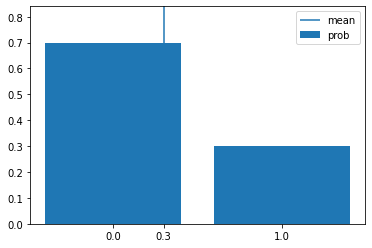

In [12]:
plot_prob(X)

In [18]:
rv = stats.bernoulli(p)
rv

In [19]:
rv.pmf(0), rv.pmf(1)

(0.7, 0.3)

In [20]:
rv.pmf([0,1])

array([0.7, 0.3])

In [21]:
rv.cdf([0, 1])

array([0.7, 1. ])

In [24]:
rv.mean(), rv.var()

(0.3, 0.21)

####  이항분포
성공 확률이 p인 베르누이 시행을 n번 했을 때의 성공 횟수가 따르는 분포  
f(x) = $_{n}\mathrm{C}_{x}p^x(1-p)^{n-x}$ $(x \in \{0,1,..,n\}$)
       
       0                     (otherwise)


In [25]:
from scipy.special import comb

def Bin(n, p):
    x_set = np.arange(n + 1)
    
    def f(x):
        if x in x_set:
            return comb(n, x) *p**x * (1-p)**(n-x)
        else:
            return 0
    return x_set, f

In [26]:
n = 10
p = 0.3
X =Bin(n, p)

In [27]:
#기댓값과 분산
check_prob(X)

expected value 3.0
variance 2.1


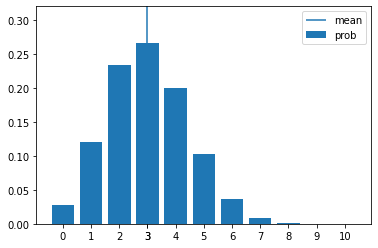

In [28]:
plot_prob(X)

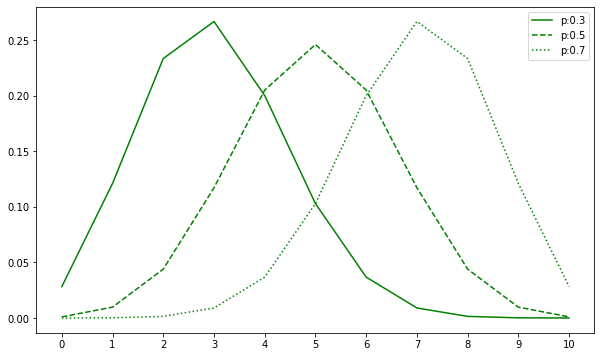

In [29]:
n = 10

fig = plt.figure(figsize =(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(n + 1)
for p, ls in zip([0.3, 0.5, 0.7], linestyles):
    rv = stats.binom(n, p)
    ax.plot(x_set, rv.pmf(x_set), label=f'p:{p}',
           ls = ls, color='green')
ax.set_xticks(x_set)
ax.legend()

plt.show()

## 기하분포


- 베르누이 시행에서 처음 성공할 때까지 반복한 시행 횟수가 따르는 분포
- 기하분포의 파라미터는 베르누이 시행의 성공 확률 파라미터 p가 되며 파라미터 p의 기하분포를 Ge(p)로 표기  

f(x) = $(1-p)^{x-1}p$ $(x \in \{1,2,3,..\})$

       0              (otherwise) 
       
- 기하분포의 기댓값과 분산 : E(X) = 1/p, V(X) = (1-p)/$p^2$


In [30]:
def Ge(p):
    x_set = np.arange(1,30) #구현 편의상 x 범위 한정
    def f(x):
        if x in x_set:
            return p * (1-p) **(x-1)
        else:
            return 0
    return x_set, f

In [31]:
p = 0.5
X = Ge(p)

In [32]:
check_prob(X)

expected value 2.0
variance 2.0


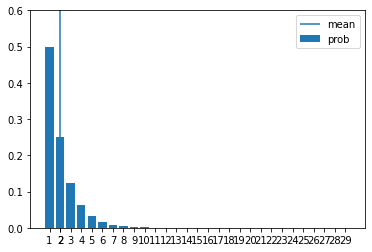

In [33]:
plot_prob(X)

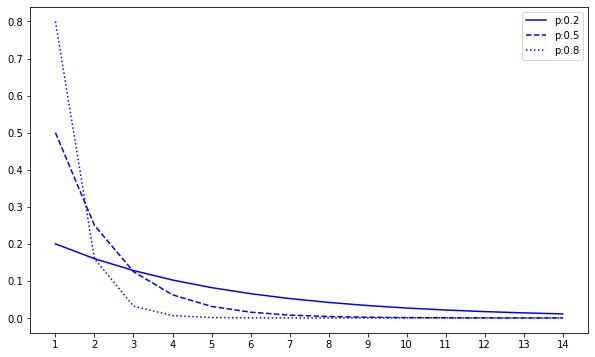

In [34]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(1, 15)
for p, ls in zip([0.2, 0.5, 0.8], linestyles):
    rv = stats.geom(p)
    ax.plot(x_set, rv.pmf(x_set), 
           label=f'p:{p}', ls=ls, color='blue')
ax.set_xticks(x_set)
ax.legend()

plt.show()

## 포아송분포

- 임의의 사건이 단위 시간당 발생하는 건수가 따르는 확률분포이며 포아송 분포의 파라미터는 $\lambda$로 나타낸다.
- 하루에 평균 2건의 교통사고가 발생하는 지역에서 하루 교통사고 발생 건수는 Poi(2)를 따른다.  
P(X=0) = 2!/0! * $e^{-2}$ = 0.135

- 포아송 분포의 기댓값과 분산을 모두 $\lambda$ 가 된다.

f(x) = $\lambda^x/x!*e^{-\lambda}$ $(x \in \{0,1,2,...\})$

       0               (otherwise)


In [36]:
from scipy.special import factorial

def Poi(lam):
    x_set = np.arange(20) #구현 편의상 x 범위 한정
    def f(x):
        if x in x_set:
            return np.power(lam, x) / factorial(x) * np.exp(-lam)
    return x_set, f

In [37]:
lam = 3
X = Poi(lam)

In [38]:
#기댓값 , 분산 
check_prob(X)

expected value 3.0
variance 3.0


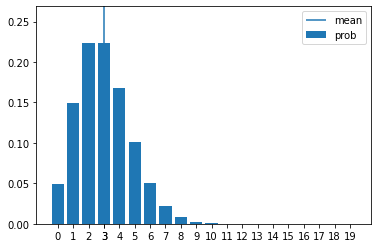

In [40]:
plot_prob(X)

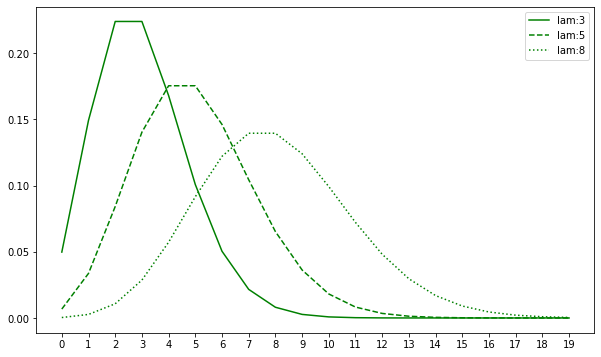

In [42]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(20)
for lam, ls in zip([3, 5, 8], linestyles):
    rv = stats.poisson(lam)
    ax.plot(x_set, rv.pmf(x_set),
           label=f'lam:{lam}', ls=ls, color='green')
ax.set_xticks(x_set)
ax.legend()

plt.show()

#### 과제[0826_1]
베루누이분포, 이항분포, 기하분포, 포아송분포의 사례를 생각하여 각각의 경우에 대한 기댓값과 분산을 산출하세요